# Machine learning and  Data streaming|

In [206]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neural_network import MLPRegressor, MLPClassifier
import joblib

In [207]:
data = pd.read_csv('data/combined_data.csv')

In [208]:
data.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Social support,Year,Country or region
0,1,7.587,0.03411,1.39651,0.94143,0.66557,0.41978,0.29678,2.51738,1.34951,2015,Switzerland
1,2,7.561,0.04884,1.30232,0.94784,0.62877,0.14145,0.43630,2.70201,1.40223,2015,Iceland
2,3,7.527,0.03328,1.32548,0.87464,0.64938,0.48357,0.34139,2.49204,1.36058,2015,Denmark
3,4,7.522,0.03880,1.45900,0.88521,0.66973,0.36503,0.34699,2.46531,1.33095,2015,Norway
4,5,7.427,0.03553,1.32629,0.90563,0.63297,0.32957,0.45811,2.45176,1.32261,2015,Canada


In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness Rank                 781 non-null    int64  
 1   Happiness Score                781 non-null    float64
 2   Standard Error                 158 non-null    float64
 3   Economy (GDP per Capita)       781 non-null    float64
 4   Health (Life Expectancy)       781 non-null    float64
 5   Freedom                        781 non-null    float64
 6   Trust (Government Corruption)  781 non-null    float64
 7   Generosity                     781 non-null    float64
 8   Dystopia Residual              470 non-null    float64
 9   Social support                 781 non-null    float64
 10  Year                           781 non-null    int64  
 11  Country or region              781 non-null    object 
dtypes: float64(9), int64(2), object(1)
memory usage: 7

In [210]:
data.isnull().sum()

Happiness Rank                     0
Happiness Score                    0
Standard Error                   623
Economy (GDP per Capita)           0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                311
Social support                     0
Year                               0
Country or region                  0
dtype: int64

In [211]:
data = data.drop(columns= ['Standard Error', 'Dystopia Residual'])

In [212]:
data.head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Social support,Year,Country or region
0,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,1.34951,2015,Switzerland
1,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,1.40223,2015,Iceland
2,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,1.36058,2015,Denmark
3,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,1.33095,2015,Norway
4,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,1.32261,2015,Canada


In [213]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_data.corr()


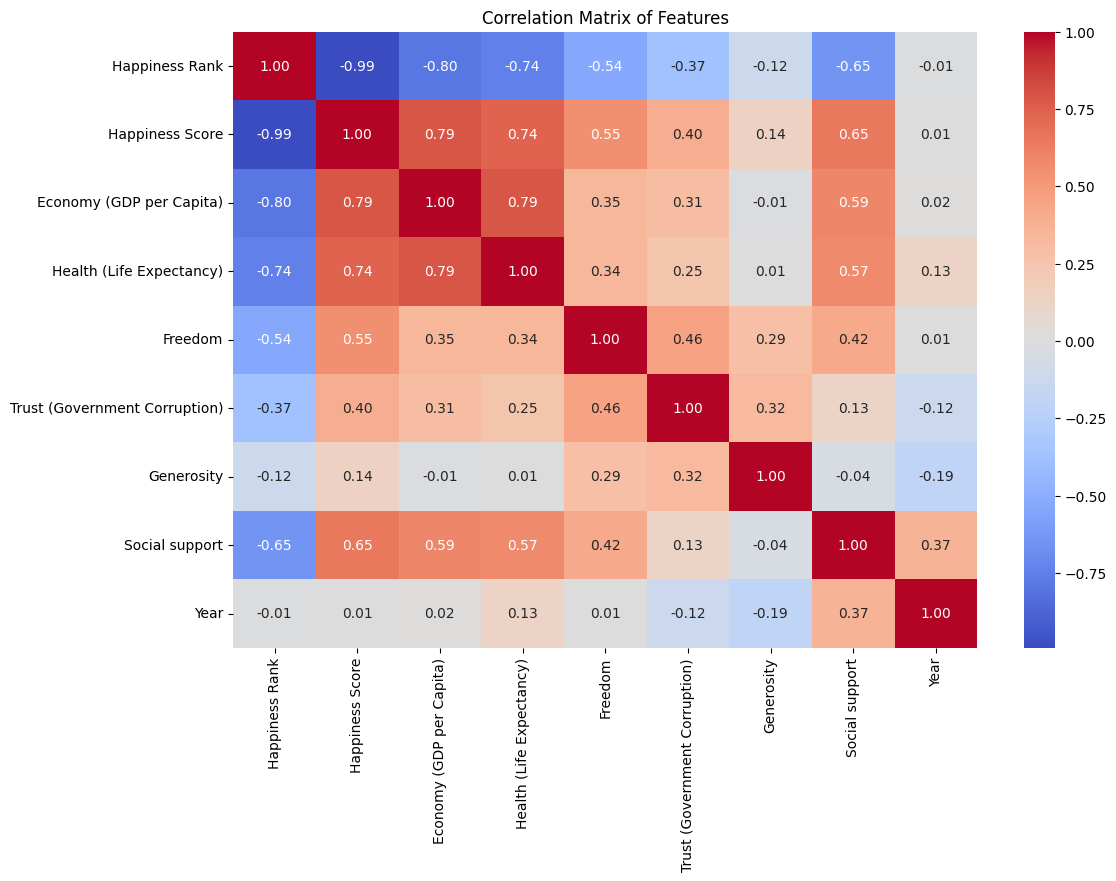

In [214]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix of Features')

# Show the plot
plt.show()

In [215]:
# features = ['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Social support', 'Freedom']
# X = data[features]
# y = data['Happiness Score']

In [216]:

country_to_continent = {
    'Switzerland': 'Europe',
    'Iceland': 'Europe',
    'Denmark': 'Europe',
    'Norway': 'Europe',
    'Canada': 'North America',
    'Finland': 'Europe',
    'Netherlands': 'Europe',
    'Sweden': 'Europe',
    'New Zealand': 'Oceania',
    'Australia': 'Oceania',
    'Israel': 'Asia',
    'Costa Rica': 'North America',
    'Austria': 'Europe',
    'Mexico': 'North America',
    'United States': 'North America',
    'Brazil': 'South America',
    'Luxembourg': 'Europe',
    'Ireland': 'Europe',
    'Belgium': 'Europe',
    'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe',
    'Oman': 'Asia',
    'Venezuela': 'South America',
    'Singapore': 'Asia',
    'Panama': 'North America',
    'Germany': 'Europe',
    'Chile': 'South America',
    'Qatar': 'Asia',
    'France': 'Europe',
    'Argentina': 'South America',
    'Czech Republic': 'Europe',
    'Uruguay': 'South America',
    'Colombia': 'South America',
    'Thailand': 'Asia',
    'Saudi Arabia': 'Asia',
    'Spain': 'Europe',
    'Malta': 'Europe',
    'Taiwan': 'Asia',
    'Kuwait': 'Asia',
    'Suriname': 'South America',
    'Trinidad and Tobago': 'North America',
    'El Salvador': 'North America',
    'Guatemala': 'North America',
    'Uzbekistan': 'Asia',
    'Slovakia': 'Europe',
    'Japan': 'Asia',
    'South Korea': 'Asia',
    'Ecuador': 'South America',
    'Bahrain': 'Asia',
    'Italy': 'Europe',
    'Bolivia': 'South America',
    'Moldova': 'Europe',
    'Paraguay': 'South America',
    'Kazakhstan': 'Asia',
    'Slovenia': 'Europe',
    'Lithuania': 'Europe',
    'Nicaragua': 'North America',
    'Peru': 'South America',
    'Belarus': 'Europe',
    'Poland': 'Europe',
    'Malaysia': 'Asia',
    'Croatia': 'Europe',
    'Libya': 'Africa',
    'Russia': 'Europe',
    'Jamaica': 'North America',
    'North Cyprus': 'Europe',
    'Cyprus': 'Europe',
    'Algeria': 'Africa',
    'Kosovo': 'Europe',
    'Turkmenistan': 'Asia',
    'Mauritius': 'Africa',
    'Hong Kong': 'Asia',
    'Estonia': 'Europe',
    'Indonesia': 'Asia',
    'Vietnam': 'Asia',
    'Turkey': 'Europe',
    'Kyrgyzstan': 'Asia',
    'Nigeria': 'Africa',
    'Bhutan': 'Asia',
    'Azerbaijan': 'Asia',
    'Pakistan': 'Asia',
    'Jordan': 'Asia',
    'Montenegro': 'Europe',
    'China': 'Asia',
    'Zambia': 'Africa',
    'Romania': 'Europe',
    'Serbia': 'Europe',
    'Portugal': 'Europe',
    'Latvia': 'Europe',
    'Philippines': 'Asia',
    'Somaliland region': 'Africa',
    'Morocco': 'Africa',
    'Macedonia': 'Europe',
    'Mozambique': 'Africa',
    'Albania': 'Europe',
    'Bosnia and Herzegovina': 'Europe',
    'Lesotho': 'Africa',
    'Dominican Republic': 'North America',
    'Laos': 'Asia',
    'Mongolia': 'Asia',
    'Swaziland': 'Africa',
    'Greece': 'Europe',
    'Lebanon': 'Asia',
    'Hungary': 'Europe',
    'Honduras': 'North America',
    'Tajikistan': 'Asia',
    'Tunisia': 'Africa',
    'Palestinian Territories': 'Asia',
    'Bangladesh': 'Asia',
    'Iran': 'Asia',
    'Ukraine': 'Europe',
    'Iraq': 'Asia',
    'South Africa': 'Africa',
    'Ghana': 'Africa',
    'Zimbabwe': 'Africa',
    'Liberia': 'Africa',
    'India': 'Asia',
    'Sudan': 'Africa',
    'Haiti': 'North America',
    'Congo (Kinshasa)': 'Africa',
    'Nepal': 'Asia',
    'Ethiopia': 'Africa',
    'Sierra Leone': 'Africa',
    'Mauritania': 'Africa',
    'Kenya': 'Africa',
    'Djibouti': 'Africa',
    'Armenia': 'Asia',
    'Botswana': 'Africa',
    'Myanmar': 'Asia',
    'Georgia': 'Asia',
    'Malawi': 'Africa',
    'Sri Lanka': 'Asia',
    'Cameroon': 'Africa',
    'Bulgaria': 'Europe',
    'Egypt': 'Africa',
    'Yemen': 'Asia',
    'Angola': 'Africa',
    'Mali': 'Africa',
    'Congo (Brazzaville)': 'Africa',
    'Comoros': 'Africa',
    'Uganda': 'Africa',
    'Senegal': 'Africa',
    'Gabon': 'Africa',
    'Niger': 'Africa',
    'Cambodia': 'Asia',
    'Tanzania': 'Africa',
    'Madagascar': 'Africa',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Guinea': 'Africa',
    'Ivory Coast': 'Africa',
    'Burkina Faso': 'Africa',
    'Afghanistan': 'Asia',
    'Rwanda': 'Africa',
    'Benin': 'Africa',
    'Syria': 'Asia',
    'Burundi': 'Africa',
    'Togo': 'Africa'
}


In [217]:
# Map 'Country or region' to 'Continent'
data['Continent'] = data['Country or region'].map(country_to_continent)


In [218]:
# Convert 'Continent' to dummy variables
data = pd.get_dummies(data, columns=['Continent'], drop_first=True)
data.replace({False: 0, True: 1}, inplace=True)


C:\Users\dayan\AppData\Local\Temp\ipykernel_17112\2586833684.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({False: 0, True: 1}, inplace=True)


In [219]:
data.drop(columns=['Country or region'])

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Social support,Year,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,1,7.587,1.39651,0.94143,0.66557,0.41978,0.29678,1.34951,2015,0,1,0,0,0
1,2,7.561,1.30232,0.94784,0.62877,0.14145,0.43630,1.40223,2015,0,1,0,0,0
2,3,7.527,1.32548,0.87464,0.64938,0.48357,0.34139,1.36058,2015,0,1,0,0,0
3,4,7.522,1.45900,0.88521,0.66973,0.36503,0.34699,1.33095,2015,0,1,0,0,0
4,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811,1.32261,2015,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,152,3.334,0.35900,0.61400,0.55500,0.41100,0.21700,0.71100,2019,0,0,0,0,0
777,153,3.231,0.47600,0.49900,0.41700,0.14700,0.27600,0.88500,2019,0,0,0,0,0
778,154,3.203,0.35000,0.36100,0.00000,0.02500,0.15800,0.51700,2019,1,0,0,0,0
779,155,3.083,0.02600,0.10500,0.22500,0.03500,0.23500,0.00000,2019,0,0,0,0,0


In [220]:
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix of Features')

# Show the plot
plt.show()

ValueError: could not convert string to float: 'Switzerland'

In [ ]:
# Data splitting
X = data.drop(columns=['Happiness Score'], axis=1)
y = data['Happiness Score']

X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define functions
def continent_dummies(df):
    df = pd.get_dummies(df, columns=['continent'], drop_first=True)
    df.columns = df.columns.str.replace(r'[^A-Za-z0-9]+', '_', regex=True).str.lower()
    return df

def select_features(df):
    return df[['economy_gdp_per_capita_', 'social_support', 'health_life_expectancy_', 'freedom', 'dystopia_residual']]

# Apply functions
X_train = continent_dummies(X_train)
x_test = continent_dummies(x_test)

X_train = select_features(X_train)
x_test = select_features(x_test)

KeyError: "None of [Index(['continent'], dtype='object')] are in the [columns]"

KeyError: "None of [Index(['continent'], dtype='object')] are in the [columns]"